# Modeling: 

## Dummy (baseline) and Linear Regressions

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define/Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Dummy Regression](#7_Modeling:_Dummy_Regression)
    * [7.1 Fitting Dummy Regression](#7.1_Fitting_Dummy_Regression)
    * [7.2 Dummy Regression Model Evaluation](#7.2_Dummy_Regression_Model_Evaluation)
 * [8. Modeling: Linear Regression](#8_Modeling:_Linear_Regression)
    * [8.1 Fitting Linear Regression](#8.1_Fitting_Linear_Regression)
    * [8.2 Linear Regression: intercept & Coefficients](#8.2_Linear_Regression:_intercept_&_Coefficients)
    * [8.3 Linear Regression: Residuals Visualization](#8.3_Linear_Regression:_Residuals_Visualization)
    * [8.4 Linear Regression Model Evaluation](#8.4_Linear_Regression_Model_Evaluation)
    * [8.5 Features Selection](#8.5_Features_Selection)
       * [8.5.1 Keeping high important Features Only](#8.5.1_Keeping_high_important_Features_Only)
       * [8.5.2 Linear Regression Model Evaluation with High Important Features](8.5.2_Linear_Regression_Model_Evaluation_with_High_Important_Features)
       * [8.5.3 Features Selection Summary](#8.5.3_Features_Selection_Summary)
    * [8.6 Linear Regression Actual vs Prediction Visualization](#8.6_Linear_Regression_Actual_vs_Prediction_Visualization)
 * [9. Models next step](#8_Models_next_step)    

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using:**
 * Dummy Regression (Baseline Model) &
 * Linear Regression



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [8]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


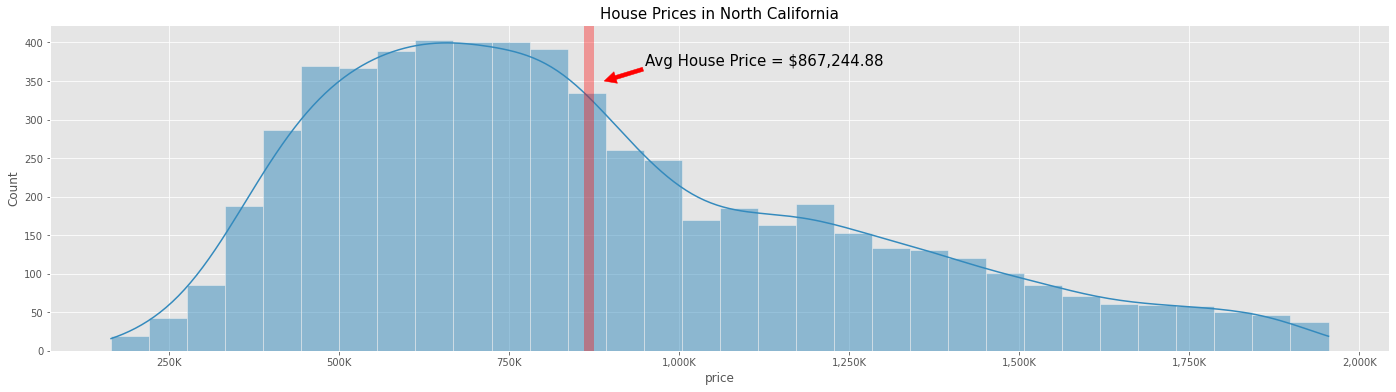

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [32]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [33]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [34]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Dummy Regression<a id='7_Modeling:-Dummy_Regression'></a>

DummyRegressor is a regressor that makes predictions using simple rules.

This regressor is useful as a simple baseline to compare with other (real) regressors.

The main role of strategy is to predict target values without any influence of the training data. There are namely four types of strategies that are used by the Dummy Regressor:-

 1. Mean: This is the default strategy used by the Dummy Regressor. It always predicts the mean of the training target values.
 2. Median: This is used to predict the median of the training target values.
 3. Quantile: It is used to predict a particular quantile of training target values provided the quantile parameter is used along with it.
 4. Constant: This is generally used to predict a specific custom value that is provided and the constant parameter must be mentioned.
 
 ### 7.1 Fitting Dummy Regression<a id='7.1_Fitting_Dummy_Regression'></a>


In [35]:
# Import LinearRegression
from sklearn.dummy import DummyRegressor

# Create the regressor: dummy_reg
dummy_reg = DummyRegressor(strategy="mean")

# Fit the regressor to the training data
dummy_reg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.2f}".format(dummy_reg.score(X_test, y_test)))


# Predict on the test data: y_pred_dummy
y_pred_dummy = dummy_reg.predict(X_test)

R-Squared coefficient : -0.00


As can be seen from the above result. The expected Dummy Regressor always predict the R-Squared as 0 , since it is always predicting a constant without having an insight of the output. ( In general, best rR-Squared is 1 and Constant R-Squared is 0).

### 7.2 Dummy Regression Model Evaluation<a id='7.2_Dummy_Regression_Model_Evaluation'></a>

In [36]:
from sklearn import metrics

print("********Dummy Regression Model Evaluation********")
print("--------------------------------------------------")
print("R^2 Score: {:.2f}".format(metrics.r2_score(y_test, y_pred_dummy) * 100), '%')
print("--------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_dummy))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("--------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dummy)))
print("--------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dummy))))
print("--------------------------------------------------")
print("Variance Score:{:.2f}".format( metrics.explained_variance_score(y_test, y_pred_dummy) * 100), '%')
print("--------------------------------------------------")

********Dummy Regression Model Evaluation********
--------------------------------------------------
R^2 Score: -0.00 %
--------------------------------------------------
Adjusted R^2 Score: -1.8341 %
--------------------------------------------------
MAE: 301148.2119
--------------------------------------------------
RMSE:376306.4570
--------------------------------------------------
Variance Score:-0.00 %
--------------------------------------------------


## 8. Modeling: Linear Regression<a id='8._Linear_Regression'></a>

Making a Linear Regression model: our first baseline model. Sklearn has a LinearRegression() function built into the linear_model module. We'll be using that to make our first regression model.

### 8.1 Fitting Linear Regression<a id='8.1_Fitting_Linear_Regression'></a>

In [17]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: lreg
lreg = LinearRegression()

# Fit the regressor to the training data
lreg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(lreg.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred_lreg = lreg.predict(X_test)




R^2 coefficient : 87.3432 %


The above score is called **R-Squared coefficient**, or the **"coefficient of determination"**. It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. **At the moment, our Linear regression model explains 87.3432 % of the variation from the mean. which is a very good news for a baseline Model**

### 8.2 Linear Regression: intercept & Coefficients<a id='8.2_Linear_Regression:_intercept_&_Coefficients'></a>

In [18]:
print("Linear Regression - intercept: {:.3f}".format(lreg.intercept_))
print("--------------------------------------")
print("***Linear Regression - Coefficients***")
print(pd.DataFrame(lreg.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))
print("--------------------------------------")

Linear Regression - intercept: 867558.259
--------------------------------------
***Linear Regression - Coefficients***
                                  coef
demand_score               30297893.78
supply_score               10942349.29
median_price_sqft_cluster    111933.31
sqft                         109978.56
baths                         98435.32
beds                          74058.55
gsRating                      68984.82
lot_size                      52204.59
AvgRoomSize                   44774.64
universities                  31587.53
school_rating                 30949.75
median_income                 20761.83
malls                         20253.64
zipcode                       17983.91
distance_miles                12228.18
school_count                  10788.83
barts                          1521.77
cluster_label                  -642.52
property_age                 -10561.01
university_count             -18904.39
days_on_market               -19162.38
hoa_month             

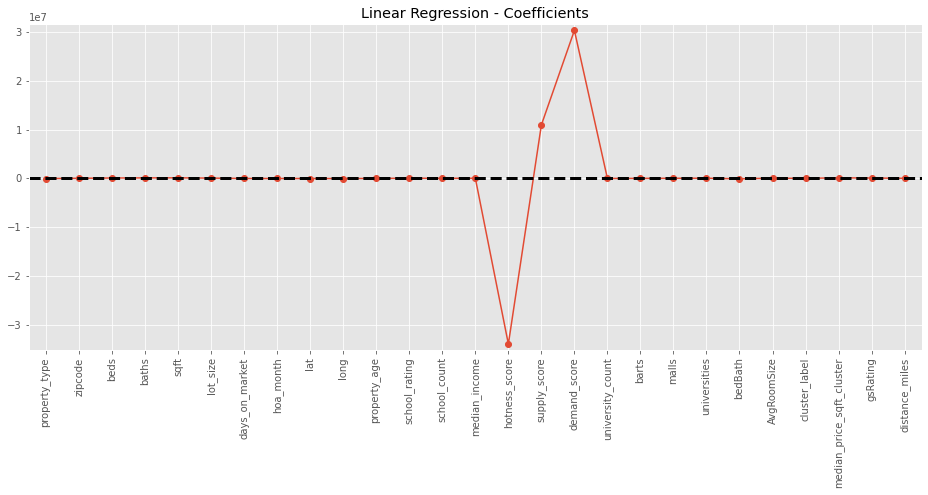

In [19]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), lreg.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.title("Linear Regression - Coefficients")
plt.margins(0.02)
plt.show()

Linear Regression: intercept & Coefficients Summary:
 * From above Linear Regression coefficients, we can see that **Regularization** is needed: As we know Linear regression minmizes a loss function by choosing  a coefficient for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting easily. so, it is common practice to alter the loss function so that it penalizes for large coefficients using **Regularization**. So next, we'll be using both Ridge Regression and Lasso Regression.
 * Also, we can see that there're few features showing very low Coefficients i.e.  'malls', 'university_count', 'property_age', so if we drop them definteley we'll improve our predictions.
 




### 8.3 Linear Regression: Residuals Visualization<a id='8.3_Linear_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

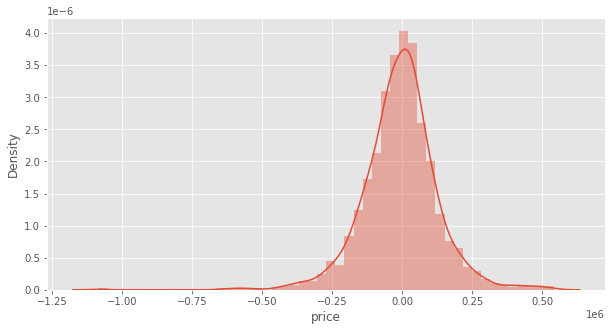

In [20]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_lreg)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 8.4 Linear Regression Model Evaluation<a id='8.4_Linear_Regression_Model_Evaluation'></a>

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [21]:
from sklearn import metrics

print("********Linear Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lreg) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_lreg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lreg)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lreg) * 100), '%')
print("-------------------------------------------------")

********Linear Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.3432 %
-------------------------------------------------------------
Adjusted R^2 Score: 87.1112 %
-------------------------------------------------
MAE: 95909.6995
-------------------------------------------------
RMSE:133875.4717
-------------------------------------------------
Variance Score:87.3781 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 133,875.4717**, which is slightly larger than 15% of the mean value of the Sales Price i.e.  $867,244.88. 

### 8.5 Features Selection<a id='8.5_Features_Selection'></a>

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 8.5.1 Keeping high important Features Only<a id='8.5.1_Keeping_high_important_Features_Only'></a> 

In [23]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [25]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

#### 8.5.2 Linear Regression Model Evaluation with High Important Features<a id='8.5.2_Linear_Regression_Model_Evaluation_with_High_Important_Features'></a> 

In [26]:
# Create the regressor: lreg_tuned
lreg_tuned = LinearRegression()

# Fit the regressor to the training data
lreg_tuned.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(lreg_tuned.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred_lreg_tuned = lreg_tuned.predict(X_test)

R^2 coefficient : 87.0594 %


In [27]:
print("********Tuned Linear Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lreg_tuned) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_lreg_tuned))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lreg_tuned)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg_tuned))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lreg_tuned) * 100), '%')
print("-------------------------------------------------")

********Tuned Linear Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 87.0594 %
-------------------------------------------------------------
Adjusted R^2 Score: 86.9199 %
-------------------------------------------------
MAE: 96522.4628
-------------------------------------------------
RMSE:135367.8835
-------------------------------------------------
Variance Score:87.0805 %
-------------------------------------------------


#### 8.5.3 Features Selection Summary<a id='8.5.3_Features_Selection_Summary'></a>

Dummy Regression and Linear regression performance summary with Features tuning:
    

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Dummy Regression - (all features)|0 %|0 %|301148.2119|376306.4570|0 %|
|Linear Regression - Baseline (all features)|87.3432 %|87.1112 %|95909.6995|133875.4717|87.3781 %|
|Linear Regression - Tuned(High Important Features)   |87.0594 %|86.9199 %|96522.4628|135367.8835|87.0805 %|


### 8.6 Linear Regression Actual vs Prediction Visualization<a id='8.6_Linear_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

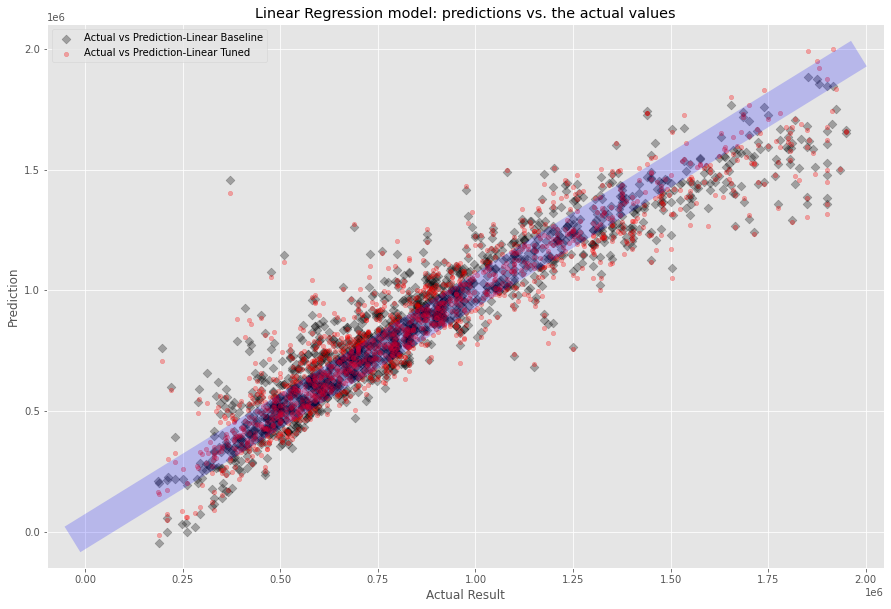

In [30]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_lreg, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Linear Baseline')
plt.scatter(y_test,y_pred_lreg_tuned, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Linear Tuned')
plt.title('Linear Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [31]:
final_lreg = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted': y_pred_lreg_tuned.round(3)})
final_lreg.head(10).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted
437,1767539,1478998.493
253,1600000,1502511.047
1804,1320000,1001933.292
4358,1170000,978582.200
2734,890000,1069159.201
4592,763000,820626.727
3924,699000,755995.703
1597,692000,593310.280
3836,635000,640229.578
841,572000,631915.266


## 9. Models next step:<a id='9_Models_next_step'></a>

Now, after building our base Model: Linear regression and comparing it with Linear Regression, let's see if we can further improve our prediction using below algorithms:

 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 

## 10. Saving our Data<a id='10_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))